<a href="https://colab.research.google.com/github/chitteti-syam/Gen-AI/blob/main/19march2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Loss = 54.55250930786133, Hub Location = [77.720276 75.89911 ]
Step 10: Loss = 53.59279251098633, Hub Location = [76.72103 74.90003]
Step 20: Loss = 52.655860900878906, Hub Location = [75.72525 73.90526]
Step 30: Loss = 51.74686050415039, Hub Location = [74.73585 72.91867]
Step 40: Loss = 50.87212371826172, Hub Location = [73.7557  71.94445]
Step 50: Loss = 50.040367126464844, Hub Location = [72.78873 70.98746]
Step 60: Loss = 49.26008605957031, Hub Location = [71.84113 70.05157]
Step 70: Loss = 48.532691955566406, Hub Location = [70.91907 69.13659]
Step 80: Loss = 47.854610443115234, Hub Location = [70.02483  68.240395]
Step 90: Loss = 47.22306823730469, Hub Location = [69.15777  67.362915]
Optimized Hub Location: [68.399216 66.59108 ]


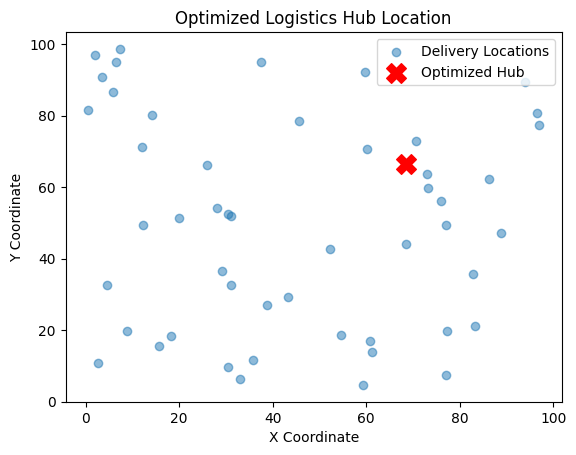

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Simulated logistics problem: Optimize delivery routes
# We use gradient descent to find the best delivery hub location

# Generate random delivery locations (latitude, longitude)
np.random.seed(42)
num_locations = 50
delivery_locations = np.random.rand(num_locations, 2) * 100  # Random 2D points in a 100x100 area

# Define a trainable variable for the delivery hub (starting at a random position)
hub_location = tf.Variable(tf.random.uniform([2], minval=0, maxval=100))

# Loss function: Minimize average distance from hub to delivery locations
def compute_loss():
    distances = tf.norm(delivery_locations - hub_location, axis=1)
    return tf.reduce_mean(distances)

# Use Gradient Descent to optimize hub location
optimizer = tf.optimizers.Adam(learning_rate=0.1)

for step in range(100):
    with tf.GradientTape() as tape:
        loss = compute_loss()
    grads = tape.gradient(loss, [hub_location])
    optimizer.apply_gradients(zip(grads, [hub_location]))

    if step % 10 == 0:
        print(f"Step {step}: Loss = {loss.numpy()}, Hub Location = {hub_location.numpy()}")

# Final optimized hub location
print(f"Optimized Hub Location: {hub_location.numpy()}")

# Plot the result
plt.scatter(delivery_locations[:, 0], delivery_locations[:, 1], label="Delivery Locations", alpha=0.5)
plt.scatter(hub_location.numpy()[0], hub_location.numpy()[1], color='red', marker='X', s=200, label="Optimized Hub")
plt.legend()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Optimized Logistics Hub Location")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# 1️⃣ Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal/Petal Length & Width
y = (iris.target == 0).astype(int)  # Binary classification: 1 for Setosa, 0 for others

# 2️⃣ Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5️⃣ Function to make predictions
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data = scaler.transform(input_data)  # Scale input
    prediction = model.predict(input_data)[0]  # 0 or 1
    return "Setosa" if prediction == 1 else "Not Setosa"

# 6️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Number(label="Sepal Length (cm)"),
        gr.Number(label="Sepal Width (cm)"),
        gr.Number(label="Petal Length (cm)"),
        gr.Number(label="Petal Width (cm)")
    ],
    outputs="text",
    title="🌺 Iris Flower Classifier",
    description="Enter flower measurements to predict if it's a Setosa species."
)

# 7️⃣ Launch the Gradio app
interface.launch()


ModuleNotFoundError: No module named 'gradio'

In [ ]:
pip install gradio seikit-learn

ERROR: Could not find a version that satisfies the requirement seikit-learn (from versions: none)
ERROR: No matching distribution found for seikit-learn


In [ ]:
!pip install gradio scikit-learn



  Using cached gradio-5.22.0-py3-none-any.whl.metadata (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# 1️⃣ Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal/Petal Length & Width
y = (iris.target == 0).astype(int)  # Binary classification: 1 for Setosa, 0 for others

# 2️⃣ Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5️⃣ Function to make predictions
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data = scaler.transform(input_data)  # Scale input
    prediction = model.predict(input_data)[0]  # 0 or 1
    return "Setosa" if prediction == 1 else "Not Setosa"

# 6️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Number(label="Sepal Length (cm)"),
        gr.Number(label="Sepal Width (cm)"),
        gr.Number(label="Petal Length (cm)"),
        gr.Number(label="Petal Width (cm)")
    ],
    outputs="text",
    title="🌺 Iris Flower Classifier",
    description="Enter flower measurements to predict if it's a Setosa species."
)

# 7️⃣ Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6aa356b7dff3d21c2d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# 1️⃣ Create a synthetic dataset (Loan Approval Data)
np.random.seed(42)
num_samples = 500

# Generate random financial data
income = np.random.randint(20000, 150000, num_samples)  # Annual income in $
loan_amount = np.random.randint(5000, 50000, num_samples)  # Loan amount requested
credit_score = np.random.randint(300, 850, num_samples)  # Credit score (300-850)
employment_status = np.random.choice([0, 1], num_samples)  # 0 = Unemployed, 1 = Employed

# Generate loan approval decision (1 = Approved, 0 = Denied)
loan_approved = (income / loan_amount > 2) & (credit_score > 600) & (employment_status == 1)
loan_approved = loan_approved.astype(int)

# Combine into a DataFrame
data = pd.DataFrame({
    "Income": income,
    "LoanAmount": loan_amount,
    "CreditScore": credit_score,
    "EmploymentStatus": employment_status,
    "LoanApproved": loan_approved
})

# 2️⃣ Split the dataset
X = data.drop(columns=["LoanApproved"])
y = data["LoanApproved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Train a Decision Tree Model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 4️⃣ Define Prediction Function
def predict_loan(income, loan_amount, credit_score, employment_status):
    input_data = np.array([[income, loan_amount, credit_score, employment_status]])
    prediction = model.predict(input_data)[0]
    return "✅ Loan Approved" if prediction == 1 else "❌ Loan Denied"

# 5️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="Annual Income ($)"),
        gr.Number(label="Loan Amount Requested ($)"),
        gr.Number(label="Credit Score (300-850)"),
        gr.Radio(["0 - Unemployed", "1 - Employed"], label="Employment Status", type="index")
    ],
    outputs="text",
    title="🏦 Loan Approval Predictor",
    description="Enter financial details to check if your loan will be approved."
)

# 6️⃣ Launch Gradio App
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://722c13a47a3199b13e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️⃣ Generate Synthetic Data (Income vs. Spending)
np.random.seed(42)
num_samples = 300
income = np.random.randint(20000, 150000, num_samples)
spending_score = np.random.randint(1, 100, num_samples)

# Create DataFrame
data = pd.DataFrame({"Income": income, "SpendingScore": spending_score})

# 2️⃣ Apply Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3️⃣ Train K-Means Model (Use k-means++ for better cluster initialization)
k = 5  # Increase clusters for better separation
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_data)

# 4️⃣ Define Prediction Function
def predict_cluster(income, spending_score):
    input_data = np.array([[income, spending_score]])
    input_data_scaled = scaler.transform(input_data)  # Ensure scaling is applied
    cluster = kmeans.predict(input_data_scaled)[0]

    return f"🟢 You belong to Cluster {cluster}!"

# 5️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Annual Income ($)"),
        gr.Number(label="Spending Score (1-100)")
    ],
    outputs="text",
    title="💰 Customer Segmentation (K-Means)",
    description="Enter your income and spending score to see which customer segment you belong to."
)

# 6️⃣ Launch Gradio App
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6de275a2a97345312b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# 1️⃣ Generate Balanced Loan Data
np.random.seed(42)
num_samples = 500

income = np.random.randint(20000, 150000, num_samples)
loan_amount = np.random.randint(5000, 50000, num_samples)
credit_score = np.random.randint(300, 850, num_samples)
employment_status = np.random.choice([0, 1], num_samples)

# Ensure balance in approved/denied loans
loan_approved = np.random.choice([0, 1], num_samples, p=[0.5, 0.5])

data = pd.DataFrame({
    "Income": income,
    "LoanAmount": loan_amount,
    "CreditScore": credit_score,
    "EmploymentStatus": employment_status,
    "LoanApproved": loan_approved
})

# 2️⃣ Split the dataset
X = data.drop(columns=["LoanApproved"])
y = data["LoanApproved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Train a Deeper Decision Tree
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train_scaled, y_train)

# 5️⃣ Define Prediction Function
def predict_loan(income, loan_amount, credit_score, employment_status):
    input_data = np.array([[income, loan_amount, credit_score, employment_status]])
    input_data = scaler.transform(input_data)  # Apply scaling
    prediction = model.predict(input_data)[0]
    return "✅ Loan Approved" if prediction == 1 else "❌ Loan Denied"

# 6️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="Annual Income ($)"),
        gr.Number(label="Loan Amount Requested ($)"),
        gr.Number(label="Credit Score (300-850)"),
        gr.Radio(["0 - Unemployed", "1 - Employed"], label="Employment Status", type="index")
    ],
    outputs="text",
    title="🏦 Loan Approval Predictor",
    description="Enter financial details to check if your loan will be approved."
)

# 7️⃣ Launch Gradio App
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4576bc7f7f9277ec76.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# 1️⃣ Generate More Realistic Loan Data
np.random.seed(42)
num_samples = 500

income = np.random.randint(20000, 150000, num_samples)  # Annual income
loan_amount = np.random.randint(5000, 50000, num_samples)  # Loan amount requested
credit_score = np.random.randint(300, 850, num_samples)  # Credit score (300-850)
employment_status = np.random.choice([0, 1], num_samples)  # 0 = Unemployed, 1 = Employed

# Generate more realistic approval logic (NOT random)
loan_approved = ((income / loan_amount > 2) & (credit_score > 600) & (employment_status == 1)).astype(int)

# Create DataFrame
data = pd.DataFrame({
    "Income": income,
    "LoanAmount": loan_amount,
    "CreditScore": credit_score,
    "EmploymentStatus": employment_status,
    "LoanApproved": loan_approved
})

# Check class balance
print(data["LoanApproved"].value_counts())  # Ensure both 0s and 1s exist

# 2️⃣ Split Data
X = data.drop(columns=["LoanApproved"])
y = data["LoanApproved"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Train Decision Tree (Lower max_depth to avoid overfitting)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 5️⃣ Define Prediction Function
def predict_loan(income, loan_amount, credit_score, employment_status):
    input_data = np.array([[income, loan_amount, credit_score, employment_status]])
    input_data = scaler.transform(input_data)  # Apply scaling
    prediction = model.predict(input_data)[0]
    return "✅ Loan Approved" if prediction == 1 else "❌ Loan Denied"

# 6️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="Annual Income ($)"),
        gr.Number(label="Loan Amount Requested ($)"),
        gr.Number(label="Credit Score (300-850)"),
        gr.Radio(["0 - Unemployed", "1 - Employed"], label="Employment Status", type="index")
    ],
    outputs="text",
    title="🏦 Loan Approval Predictor",
    description="Enter financial details to check if your loan will be approved."
)

# 7️⃣ Launch Gradio App
interface.launch()


LoanApproved
0    427
1     73
Name: count, dtype: int64
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://80c40ef1dab6246a1c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️⃣ Generate Synthetic Data (Income vs. Spending)
np.random.seed(42)
num_samples = 300
income = np.random.randint(20000, 150000, num_samples)
spending_score = np.random.randint(1, 100, num_samples)

# Create DataFrame
data = pd.DataFrame({"Income": income, "SpendingScore": spending_score})

# 2️⃣ Apply Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3️⃣ Train K-Means Model
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_data)

# 4️⃣ Define Prediction Function
def predict_cluster(income, spending_score):
    input_data = np.array([[income, spending_score]])
    input_data_scaled = scaler.transform(input_data)
    cluster = kmeans.predict(input_data_scaled)[0]

    return f"🟢 You belong to Cluster {cluster}!"

# 5️⃣ Create Gradio Interface
interface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Annual Income ($)"),
        gr.Number(label="Spending Score (1-100)")
    ],
    outputs="text",
    title="💰 Customer Segmentation (K-Means)",
    description="Enter your income and spending score to see which customer segment you belong to."
)

# 6️⃣ Launch Gradio App
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://17a8199b9e1b11b13d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
